# Part 5 Scikit-learn Comparison 


## Linear regression


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [110]:
df = pd.read_csv('zuucrew.csv')
df.head()



,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
3,Nisal Gamage,1,74.5,63.9,7,0,76.8,1.7,Production-Ready ML Systems,100.0
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1


In [111]:
df = df[df['CourseName']=='Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [112]:
X = df[['TotalHours']].values   
y = df["CapstoneScore"].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




Intercept: 55.10833333333334
Coefficients: [16.15041781]
MSE: 24.8928241033242
MAE: 3.935106967711104
RMSE: 4.989270898971532
R²: 0.912879547286394


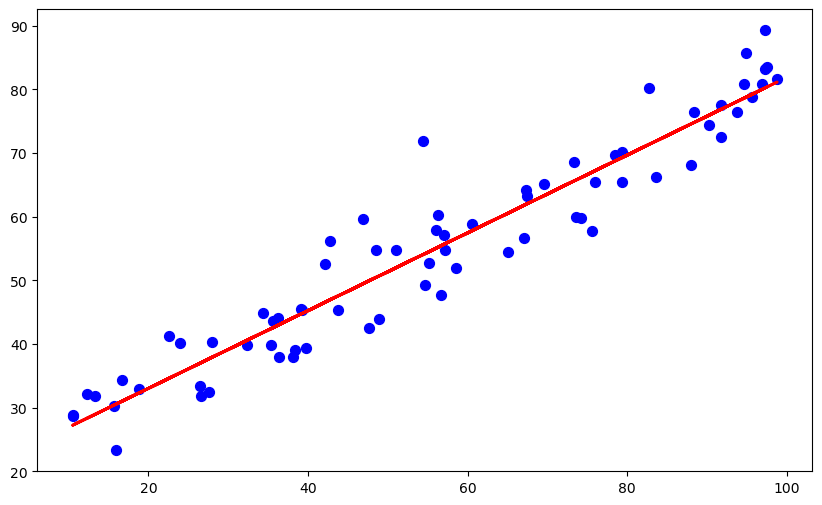

In [113]:


lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y)

# Predictions
y_pred = lin_reg.predict(X_scaled)

# Parameters
print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)

# Evaluation
print("MSE:", mean_squared_error(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
print("R²:", r2_score(y, y_pred))

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', s=50, label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

## Polynomial regression

Number of parameters: 3
Intercept: 54.336425564369385
Coefficients: [ 0.         16.12715013  0.77190777]
MSE: 24.385294090683313
MAE: 3.8239508035612206
RMSE: 4.93814682757442
R²: 0.9146558119755062


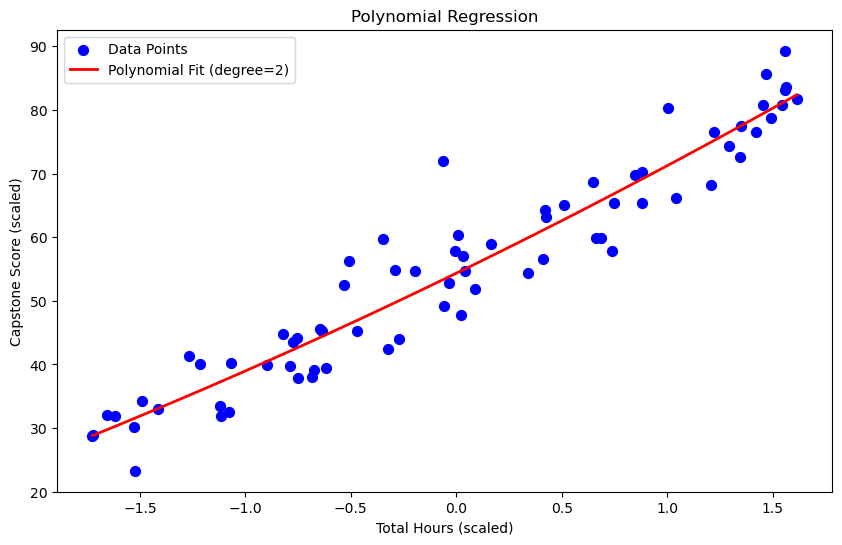

In [115]:

# Polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=True)
X_poly = poly.fit_transform(X_scaled)

# Train sklearn model
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Predictions
y_pred_poly = poly_reg.predict(X_poly)

# Generate smooth curve
X_curve = np.linspace(min(X_scaled), max(X_scaled), 100).reshape(-1, 1)
X_curve_poly = poly.transform(X_curve)
y_curve = poly_reg.predict(X_curve_poly)

# Parameters
print("Number of parameters:", len(poly_reg.coef_))
print("Intercept:", poly_reg.intercept_)
print("Coefficients:", poly_reg.coef_)

# Evaluation
print("MSE:", mean_squared_error(y, y_pred_poly))
print("MAE:", mean_absolute_error(y, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred_poly)))
print("R²:", r2_score(y, y_pred_poly))

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y, color='blue', s=50, label='Data Points')
plt.plot(X_curve, y_curve, color='red', linewidth=2, label=f'Polynomial Fit (degree={degree})')
plt.xlabel("Total Hours (scaled)")
plt.ylabel("Capstone Score (scaled)")
plt.title("Polynomial Regression")
plt.legend()
plt.show()
